Use k-means clustering for image segmentation and to identify dominant color in the image

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('dogs.jpeg') #import the image
img.show()

In [3]:
import numpy as np
imagearray=np.array(img) #this will convert the image in to a binary matrix.

In [4]:
imagearray.shape #this is a 3 Dimensional array. the 3rd array stores the color data

(185, 272, 3)

In [20]:
185*272*3 #total no.of elements in the array

150960

In [6]:
imagearray.reshape(-1,3)

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [7]:
imagearray.reshape(-1,3).shape

(50320, 3)

In [8]:
50320*3

150960

For the clustering we are using K mean

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(imagearray.reshape(-1,3))

KMeans(n_clusters=3)

In [10]:
img_seg=km.cluster_centers_

In [11]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
img_seg=img_seg[km.labels_]

In [13]:
img_seg

array([[251.46909476, 247.64969019, 243.10790388],
       [251.46909476, 247.64969019, 243.10790388],
       [251.46909476, 247.64969019, 243.10790388],
       ...,
       [251.46909476, 247.64969019, 243.10790388],
       [251.46909476, 247.64969019, 243.10790388],
       [251.46909476, 247.64969019, 243.10790388]])

In [14]:
img_seg=img_seg.reshape(imagearray.shape)

In [15]:
img = Image.fromarray(img_seg, 'RGB')
img.save('my.png')
img.show()

In [16]:
km.cluster_centers_

array([[251.46909476, 247.64969019, 243.10790388],
       [ 29.50349995,  21.57579569,  20.47107076],
       [210.58877124, 174.7632767 , 143.63342362]])

In [17]:
img_dom=km.cluster_centers_/255 #by dividing by 255 we are converting each standardized value to scaled value

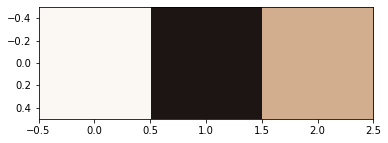

In [18]:
import matplotlib.image as img
import matplotlib.pyplot as plt
plt.imshow([img_dom])
plt.show()

We got the three most dominant colours. Now as an activity lets check the elbow plot and do the same for more number of clusters

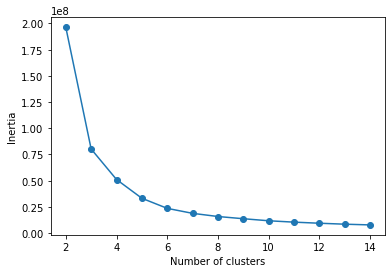

In [27]:
cluster_range= range(2,15)
inertia = []

for num in cluster_range:
  km = KMeans(num)
  km.fit(imagearray.reshape(-1,3))
  inertia.append(km.inertia_)

plt.plot(cluster_range,inertia,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Lets check clusters num as 6.

In [28]:
km = KMeans(n_clusters=6)
km.fit(imagearray.reshape(-1,3))
img_seg=km.cluster_centers_
img_seg=img_seg[km.labels_]

In [29]:
img_seg

array([[253.41408348, 252.816268  , 251.71253356],
       [253.41408348, 252.816268  , 251.71253356],
       [253.41408348, 252.816268  , 251.71253356],
       ...,
       [253.41408348, 252.816268  , 251.71253356],
       [253.41408348, 252.816268  , 251.71253356],
       [253.41408348, 252.816268  , 251.71253356]])

In [30]:
img_seg=img_seg.reshape(imagearray.shape)
img = Image.fromarray(img_seg, 'RGB')
img.save('my.png')
img.show()

In [31]:
km.cluster_centers_

array([[  9.40573695,   5.7146283 ,   5.7154584 ],
       [237.38131071, 212.84375428, 187.69380216],
       [211.49399021, 171.66656774, 137.40940792],
       [138.50408497, 106.39419935,  86.1499183 ],
       [253.41408348, 252.816268  , 251.71253356],
       [ 51.9796785 ,  39.68304519,  38.57628147]])

In [32]:
img_dom=km.cluster_centers_/255

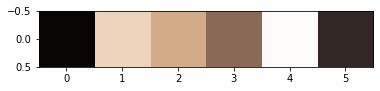

In [33]:
import matplotlib.image as img
import matplotlib.pyplot as plt
plt.imshow([img_dom])
plt.show()